<a href="https://colab.research.google.com/github/vjkr/AITK_EE_Projects1-2/blob/main/Project_1_Renewable_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Source
# https://www.kaggle.com/discussions/accomplishments/477019
### https://www.kaggle.com/code/mehmetisik/03-renewable-power-trends-1965-2022/notebook

In [ ]:
!git clone https://github.com/vjkr/AITK_EE_Projects1-2.git

Cloning into 'AITK_EE_Projects1-2'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 82.01 KiB | 1.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from matplotlib.font_manager import FontProperties
from IPython.display import HTML as html_print
from termcolor import colored
from scipy import stats

In [ ]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
df_3 = pd.read_csv("/content/AITK_EE_Projects1-2/03 modern-renewable-prod.csv")

In [ ]:
df_3.head()


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000,0.310,0.000,0.000
1,Afghanistan,AFG,2001,0.000,0.500,0.000,0.000
2,Afghanistan,AFG,2002,0.000,0.560,0.000,0.000
3,Afghanistan,AFG,2003,0.000,0.630,0.000,0.000
4,Afghanistan,AFG,2004,0.000,0.560,0.000,0.000


In [ ]:
df_3.tail()


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000,3.970,0.010,0.320
8847,Zimbabwe,ZWE,2018,0.000,5.050,0.020,0.390
8848,Zimbabwe,ZWE,2019,0.000,4.170,0.030,0.380
8849,Zimbabwe,ZWE,2020,0.000,3.810,0.030,0.350
8850,Zimbabwe,ZWE,2021,0.000,4.000,0.040,0.380


In [ ]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_head_and_tail(dataframe, head=5):
    display(dataframe.head(head).style.set_caption("Head"))
    display(dataframe.tail(head).style.set_caption("Tail"))

def display_na(dataframe):
    na_df = dataframe.isnull().sum().reset_index()
    na_df.columns = ['Column', 'Number of NA']
    display(na_df.style.set_caption("Number of NA Values"))

def display_quantiles(dataframe):
    quantiles_df = dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
    print_section_title('Shape')
    print(dataframe.shape)
    print_section_title('Types')
    print(dataframe.dtypes.to_frame('Data Type').style.set_caption("Data Types"))
    print_section_title('Head & Tail')
    display_head_and_tail(dataframe, head)
    print_section_title('NA Values')
    display_na(dataframe)
    print_section_title('Quantiles')
    display_quantiles(dataframe)

check_df(df_3)

Shape
(8851, 7)
Types
Head & Tail


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
0,Afghanistan,AFG,2000,0.000000,0.310000,0.000000,0.000000
1,Afghanistan,AFG,2001,0.000000,0.500000,0.000000,0.000000
2,Afghanistan,AFG,2002,0.000000,0.560000,0.000000,0.000000
3,Afghanistan,AFG,2003,0.000000,0.630000,0.000000,0.000000
4,Afghanistan,AFG,2004,0.000000,0.560000,0.000000,0.000000


,Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
8846,Zimbabwe,ZWE,2017,0.000000,3.970000,0.010000,0.320000
8847,Zimbabwe,ZWE,2018,0.000000,5.050000,0.020000,0.390000
8848,Zimbabwe,ZWE,2019,0.000000,4.170000,0.030000,0.380000
8849,Zimbabwe,ZWE,2020,0.000000,3.810000,0.030000,0.350000
8850,Zimbabwe,ZWE,2021,0.000000,4.000000,0.040000,0.380000


NA Values


,Column,Number of NA
0,Entity,0
1,Code,1555
2,Year,0
3,Electricity from wind (TWh),175
4,Electricity from hydro (TWh),11
5,Electricity from solar (TWh),168
6,Other renewables including bioenergy (TWh),220


Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,8851.00,1999.91,15.75,1965.00,1965.00,1969.00,2004.00,2020.00,2021.00,2022.00,2022.00
Electricity from wind (TWh),8676.00,14.57,86.39,0.00,0.00,0.00,0.00,35.82,433.23,1848.26,1848.26
Electricity from hydro (TWh),8840.00,116.58,360.23,0.00,0.00,0.00,3.53,697.49,1861.13,4340.61,4340.61
Electricity from solar (TWh),8683.00,5.28,40.10,0.00,0.00,0.00,0.00,5.33,158.19,1040.50,1040.50
Other renewables including bioenergy (TWh),8631.00,12.24,48.35,0.00,0.00,0.00,0.02,76.41,243.76,761.93,761.93


In [ ]:
df_3 = df_3.drop(columns=['Code'])


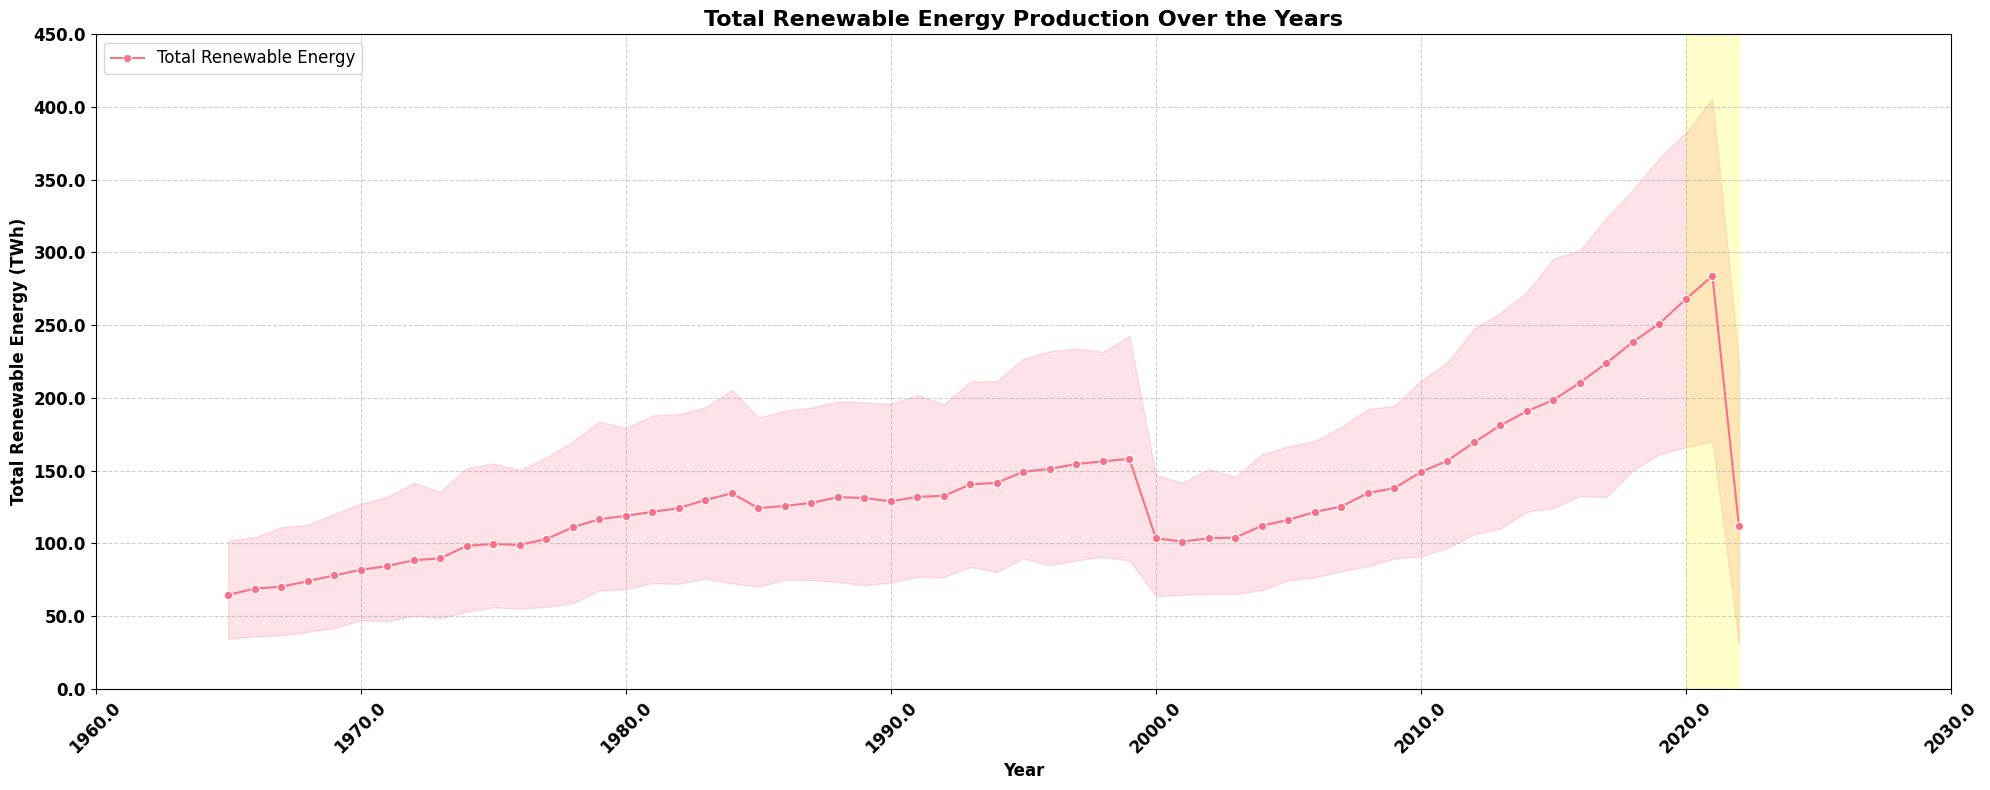

In [ ]:
df_3['Total Renewable (TWh)'] = df_3[['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']].sum(axis=1)

colors = sns.color_palette("husl")

fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(x='Year', y='Total Renewable (TWh)', data=df_3, marker='o', color=colors[0], ax=ax, label='Total Renewable Energy')

max_point = df_3[df_3['Total Renewable (TWh)'] == df_3['Total Renewable (TWh)'].max()]
ax.annotate(f"Max: {max_point['Year'].values[0]}",
            xy=(max_point['Year'].values[0], max_point['Total Renewable (TWh)'].values[0]),
            xytext=(-50, 50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='black', lw=1),
            fontsize=12)

plt.title('Total Renewable Energy Production Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Renewable Energy (TWh)', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(fontsize=12)

ax.axvspan(max_point['Year'].values[0] - 1, max_point['Year'].values[0] + 1, alpha=0.2, color='yellow')

font = FontProperties()
font.set_weight('bold')
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticks(), fontproperties=font)
ax.set_yticklabels(ax.get_yticks(), fontproperties=font)

plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


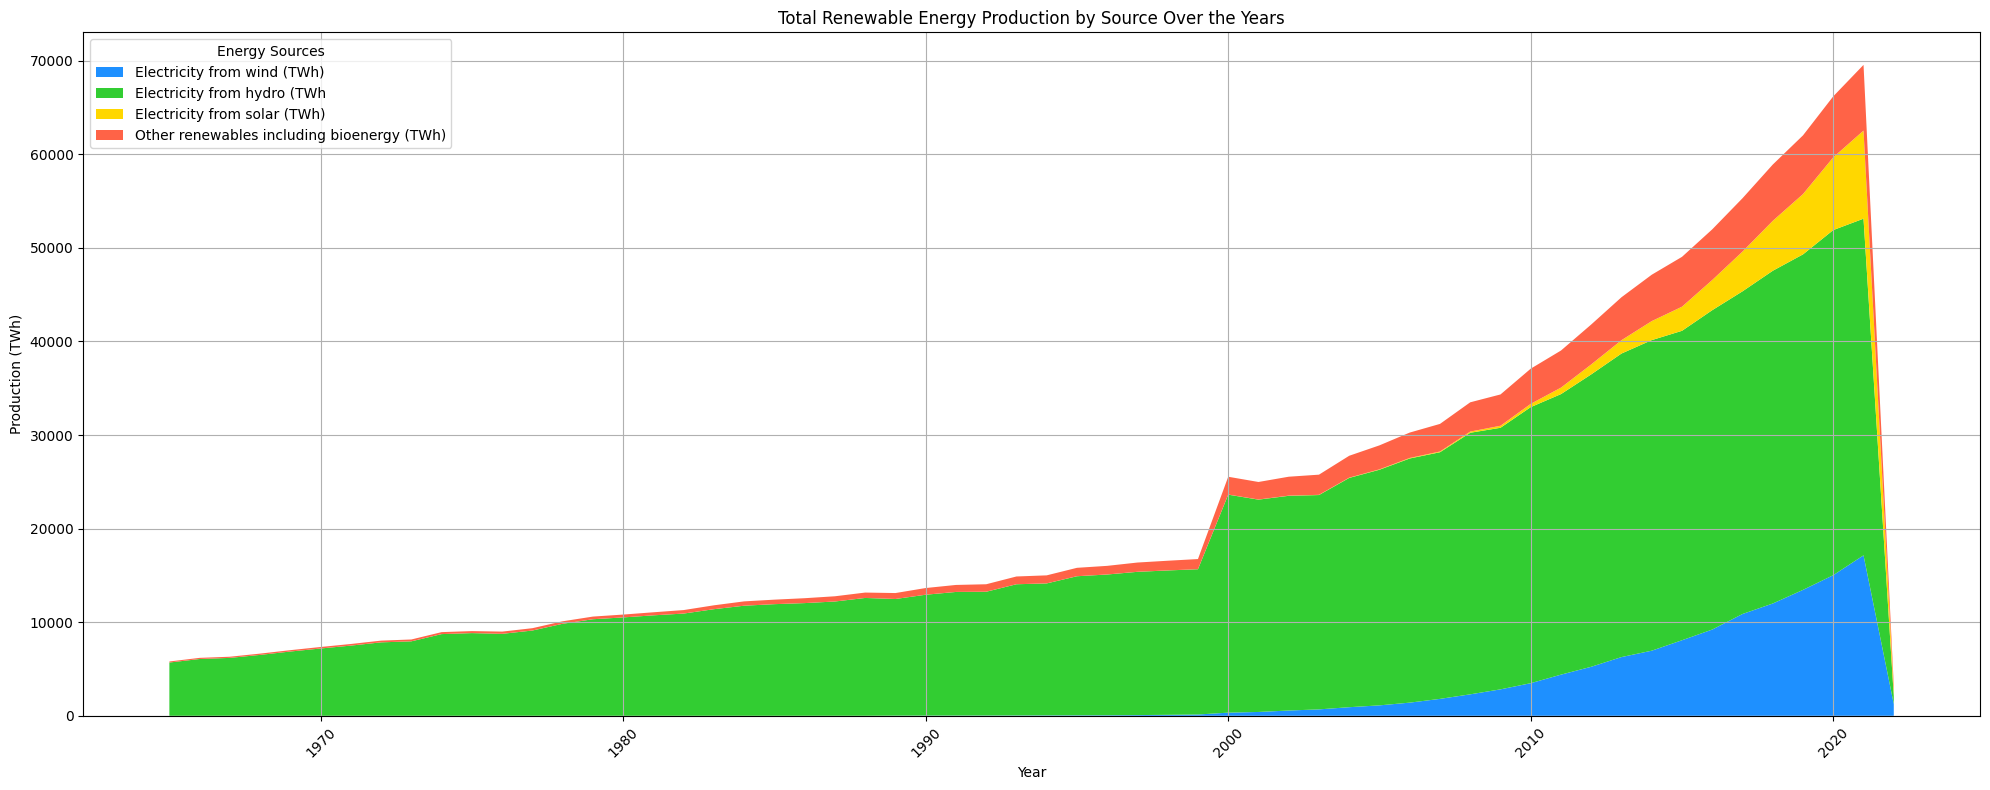

In [ ]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_by_source_yearly = df_3.groupby('Year')[energy_types].sum().reset_index()

colors = ['dodgerblue', 'limegreen', 'gold', 'tomato']

plt.figure(figsize=(20, 8))

plt.stackplot(total_renewable_by_source_yearly['Year'],
              total_renewable_by_source_yearly['Electricity from wind (TWh)'],
              total_renewable_by_source_yearly['Electricity from hydro (TWh)'],
              total_renewable_by_source_yearly['Electricity from solar (TWh)'],
              total_renewable_by_source_yearly['Other renewables including bioenergy (TWh)'],
              labels=['Electricity from wind (TWh)', 'Electricity from hydro (TWh', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)'], colors=colors)

plt.title('Total Renewable Energy Production by Source Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (TWh)')
plt.legend(loc='upper left', title='Energy Sources')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-12-65aa4eb7f300>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


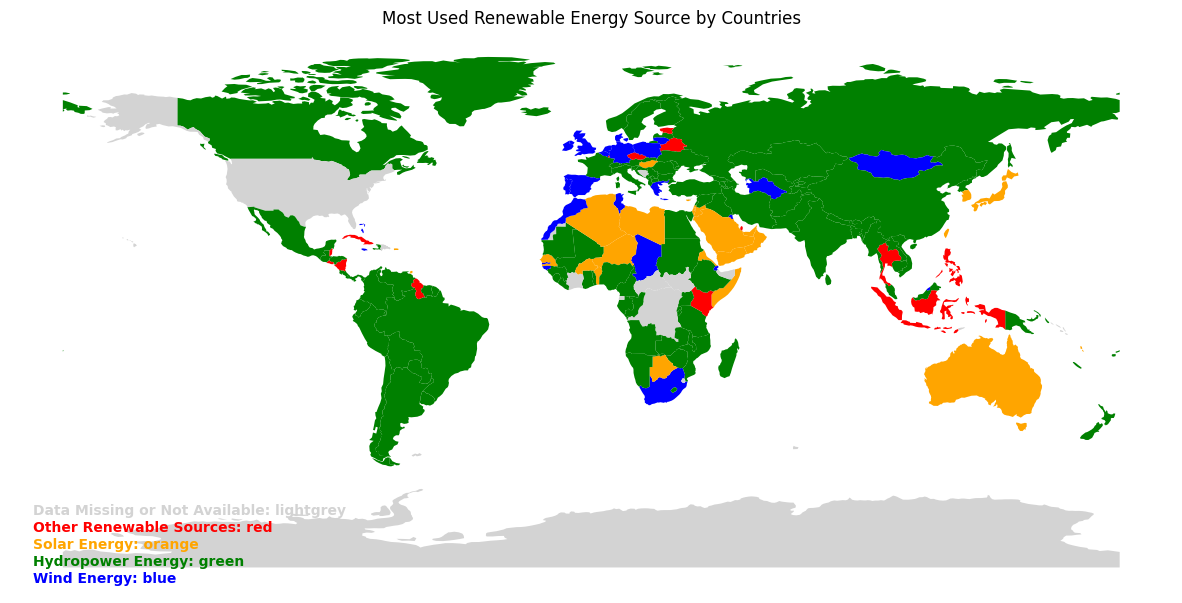

In [ ]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)', 'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

latest_data = df_3.sort_values('Year').groupby('Entity').last().reset_index()

latest_data['Most Used Renewable Source'] = latest_data[energy_types].idxmax(axis=1)

color_map = {
    'Electricity from wind (TWh)': 'blue',
    'Electricity from hydro (TWh)': 'green',
    'Electricity from solar (TWh)': 'orange',
    'Other renewables including bioenergy (TWh)': 'red'
}
latest_data['Color'] = latest_data['Most Used Renewable Source'].map(color_map)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.set_index('name').join(latest_data.set_index('Entity'))

color_map[np.nan] = 'lightgrey'
merged['Color'] = merged['Color'].fillna('lightgrey')

def add_legend(ax):
    legend_labels = {
        'blue': 'Wind Energy',
        'green': 'Hydropower Energy',
        'orange': 'Solar Energy',
        'red': 'Other Renewable Sources',
        'lightgrey': 'Data Missing or Not Available'
    }
    for color, label in legend_labels.items():
        ax.annotate(
            f'{label}: {color}',
            xy=(0.02, 0.02 + list(color_map.values()).index(color) * 0.03),
            xycoords='axes fraction',
            fontsize=10,
            color=color,
            weight='bold'
        )

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(color=merged['Color'], ax=ax, legend=False)
add_legend(ax)
ax.set_title('Most Used Renewable Energy Source by Countries')
ax.set_axis_off()

plt.show()


<ipython-input-13-d8b60c94e5ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-13-d8b60c94e5ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-13-d8b60c94e5ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
<ipython-input-13-d8b60c94e5ca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

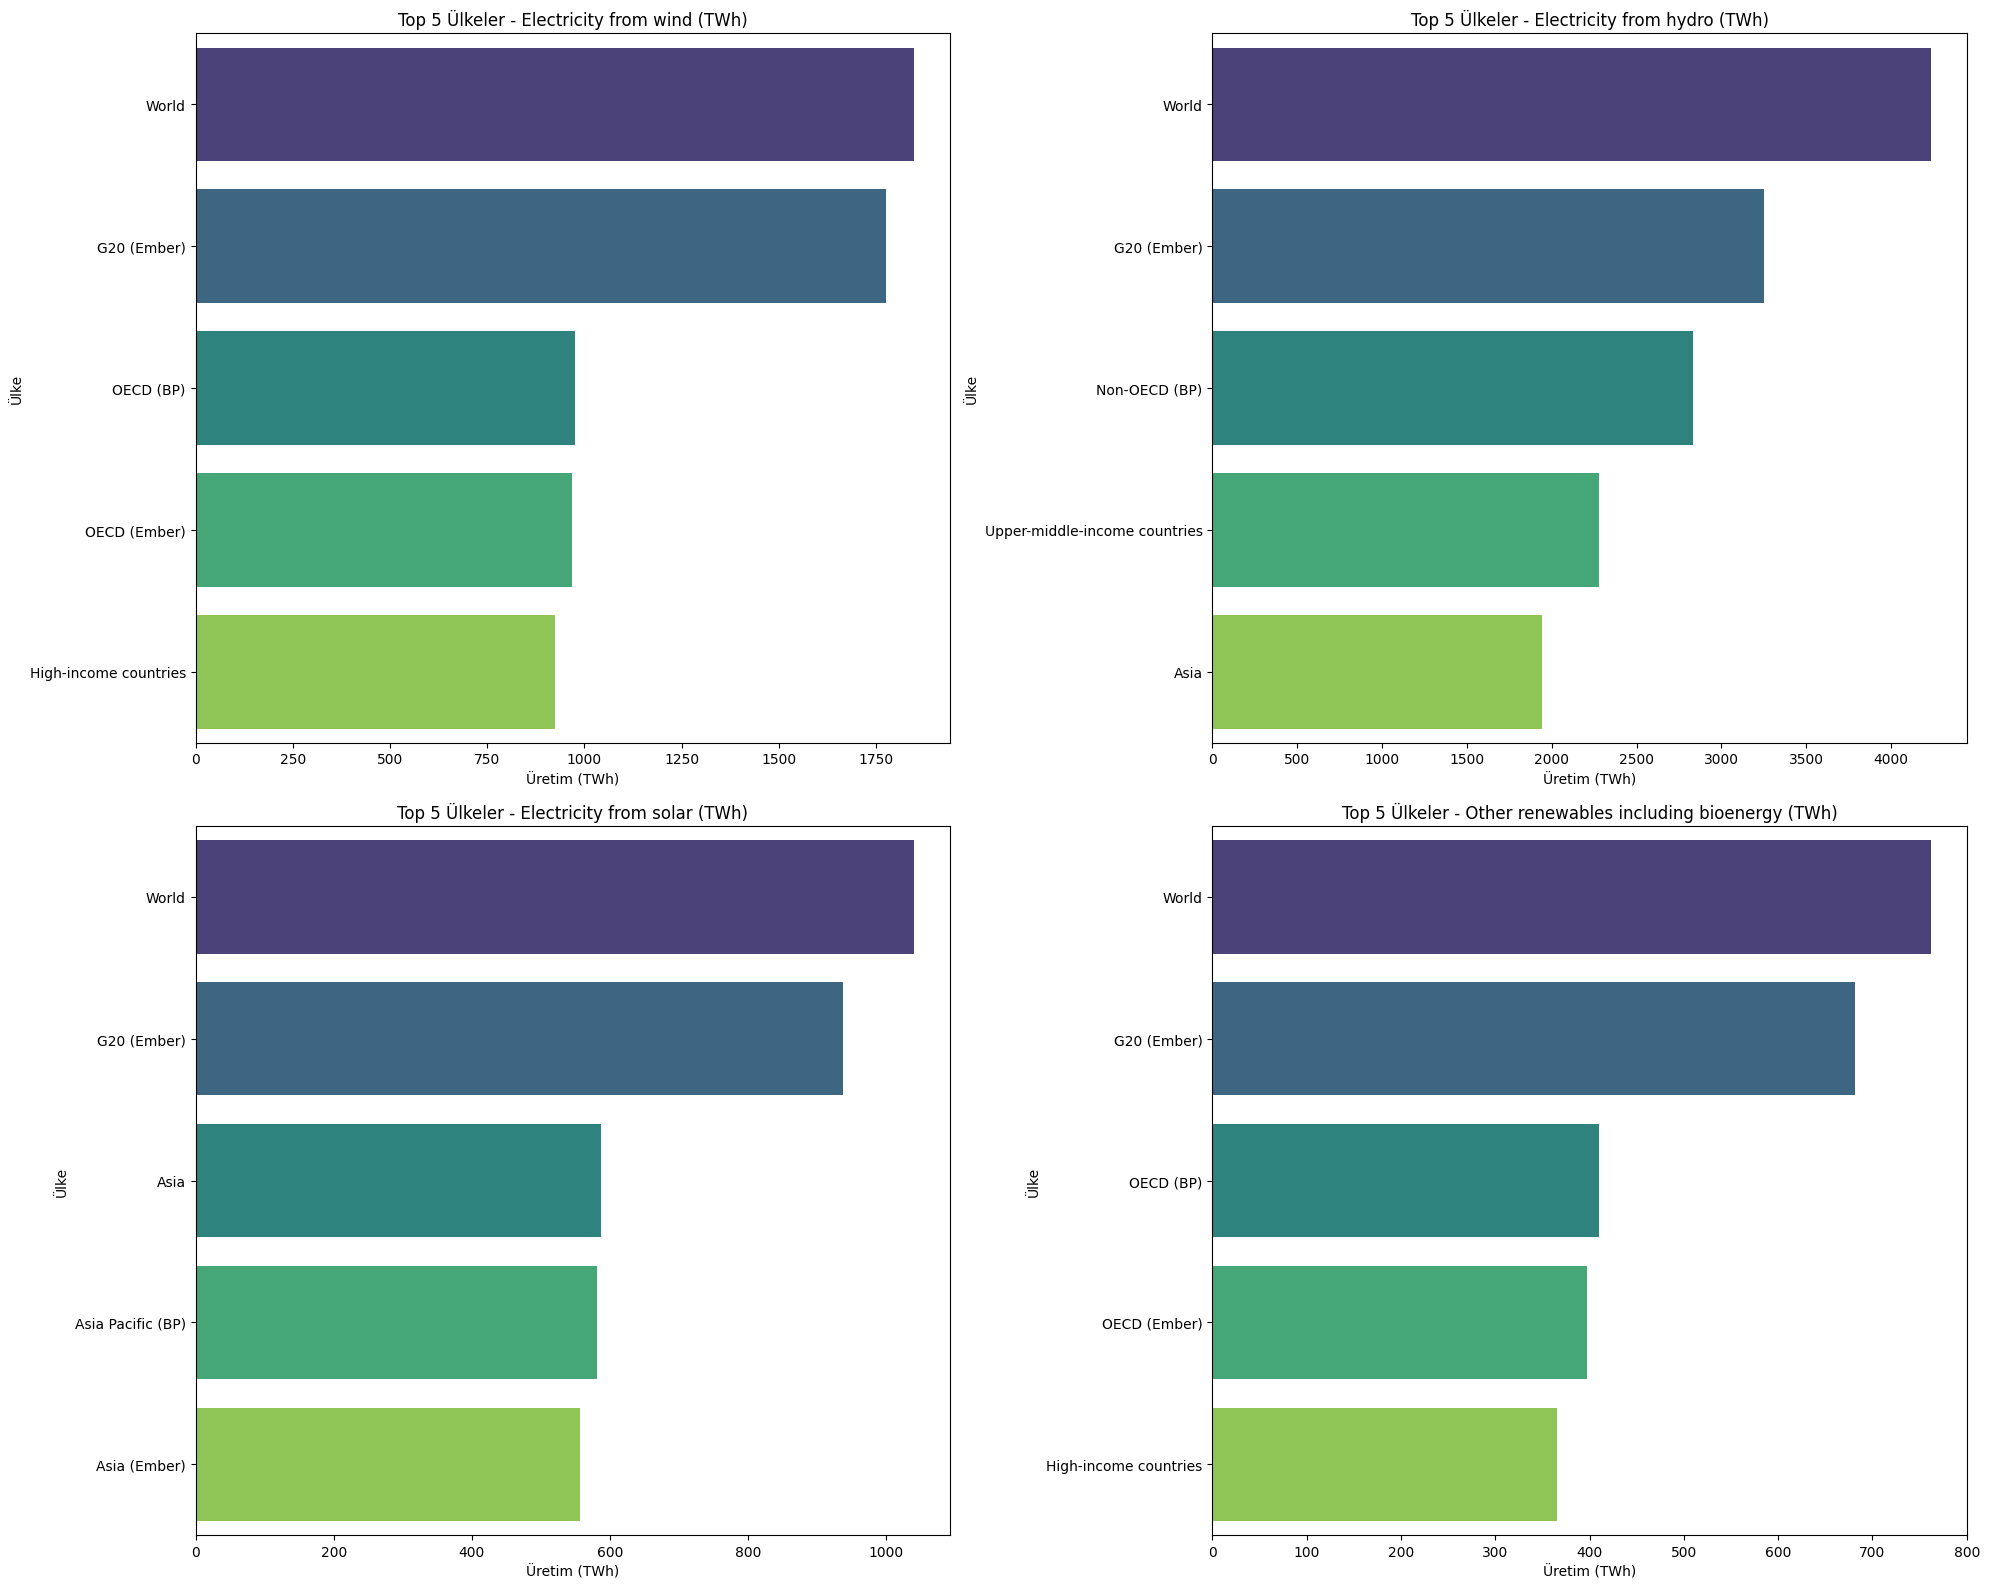

In [ ]:
top_countries_by_source = {}
for energy_type in energy_types:
    top_countries = latest_data.sort_values(by=energy_type, ascending=False).head(5)
    top_countries_by_source[energy_type] = top_countries[['Entity', energy_type]]

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
for i, (energy_type, df) in enumerate(top_countries_by_source.items()):
    ax = axes[i // 2, i % 2]
    sns.barplot(x=df[energy_type], y=df['Entity'], ax=ax, palette="viridis")
    ax.set_title(f'Top 5 Ülkeler - {energy_type}')
    ax.set_xlabel('Üretim (TWh)')
    ax.set_ylabel('Ülke')

plt.tight_layout()
plt.show()

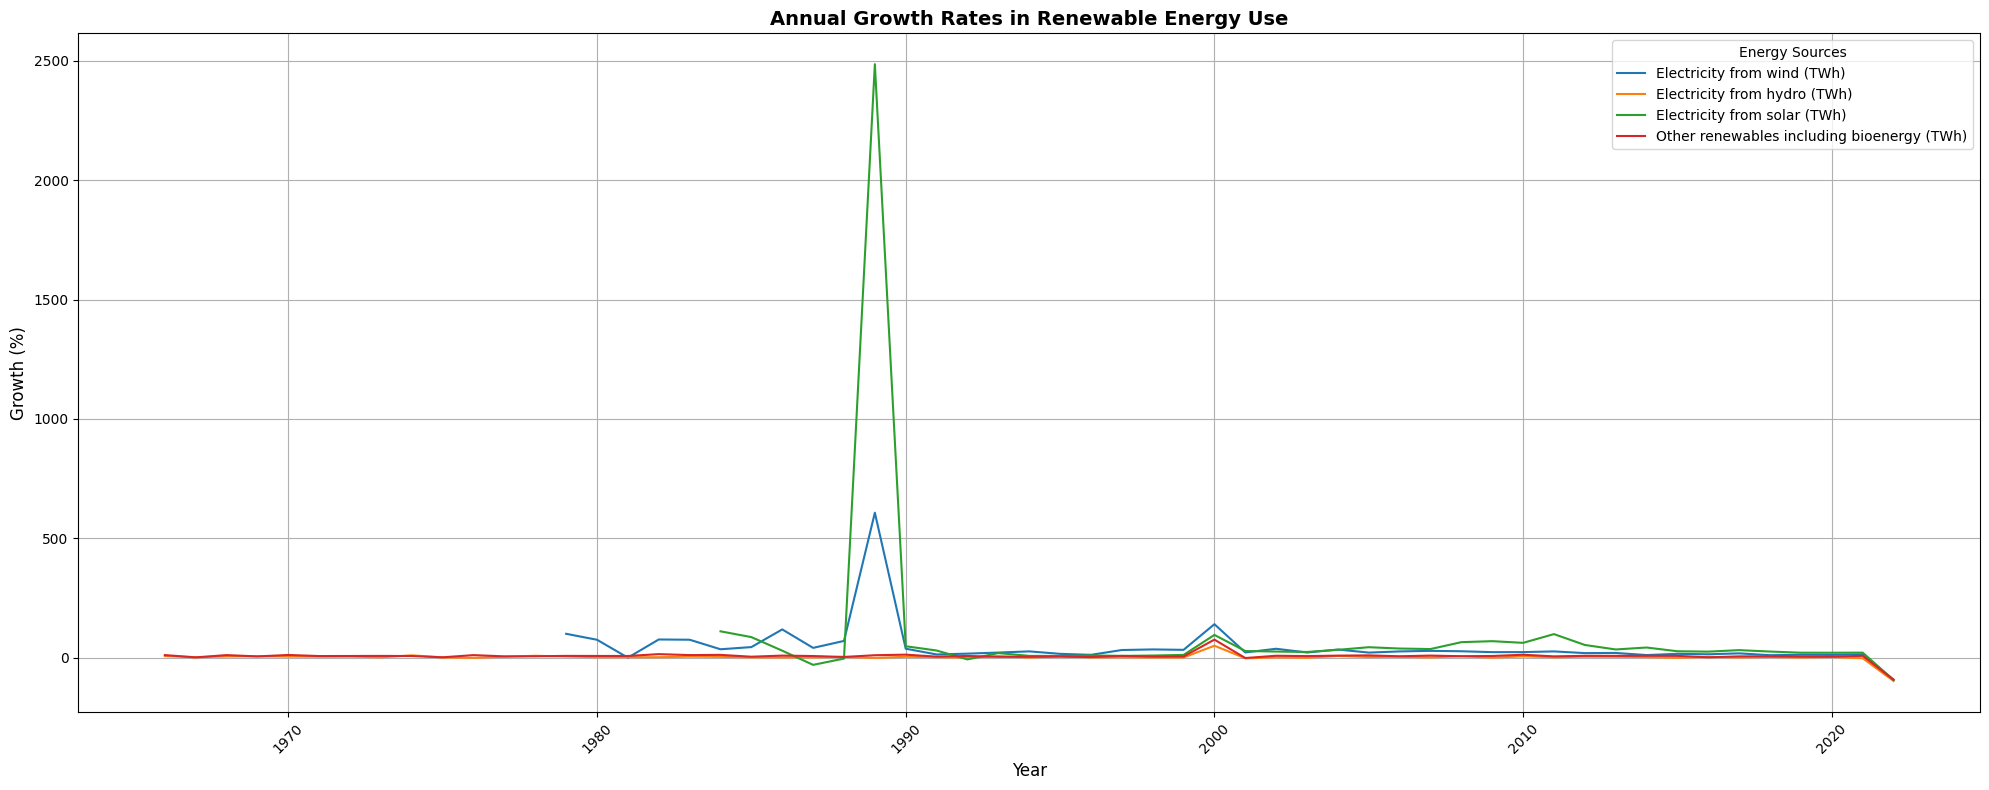

In [ ]:
energy_types = ['Electricity from wind (TWh)', 'Electricity from hydro (TWh)',
                'Electricity from solar (TWh)', 'Other renewables including bioenergy (TWh)']

total_renewable_comparison = df_3.groupby('Year')[energy_types].sum()
growth_rates = total_renewable_comparison.pct_change().multiply(100)

plt.figure(figsize=(20, 8))

palette = sns.color_palette("tab10", len(energy_types))

for i, energy_type in enumerate(energy_types):
    sns.lineplot(data=growth_rates, x=growth_rates.index, y=energy_type, label=energy_type, color=palette[i])

plt.title('Annual Growth Rates in Renewable Energy Use', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth (%)', fontsize=12)

plt.legend(title='Energy Sources')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
selected_countries = ['Turkey', 'United States', 'China', 'Germany', 'Brazil', 'India', 'South Africa']

regional_data = latest_data[latest_data['Entity'].isin(selected_countries)]

fig = px.bar(regional_data, x='Entity', y='Total Renewable (TWh)', color='Entity',
             title='Regional Renewable Energy Production',
             labels={'Entity': 'Country', 'Total Renewable (TWh)': 'Total Renewable Energy Generation (TWh)'})

fig.show()

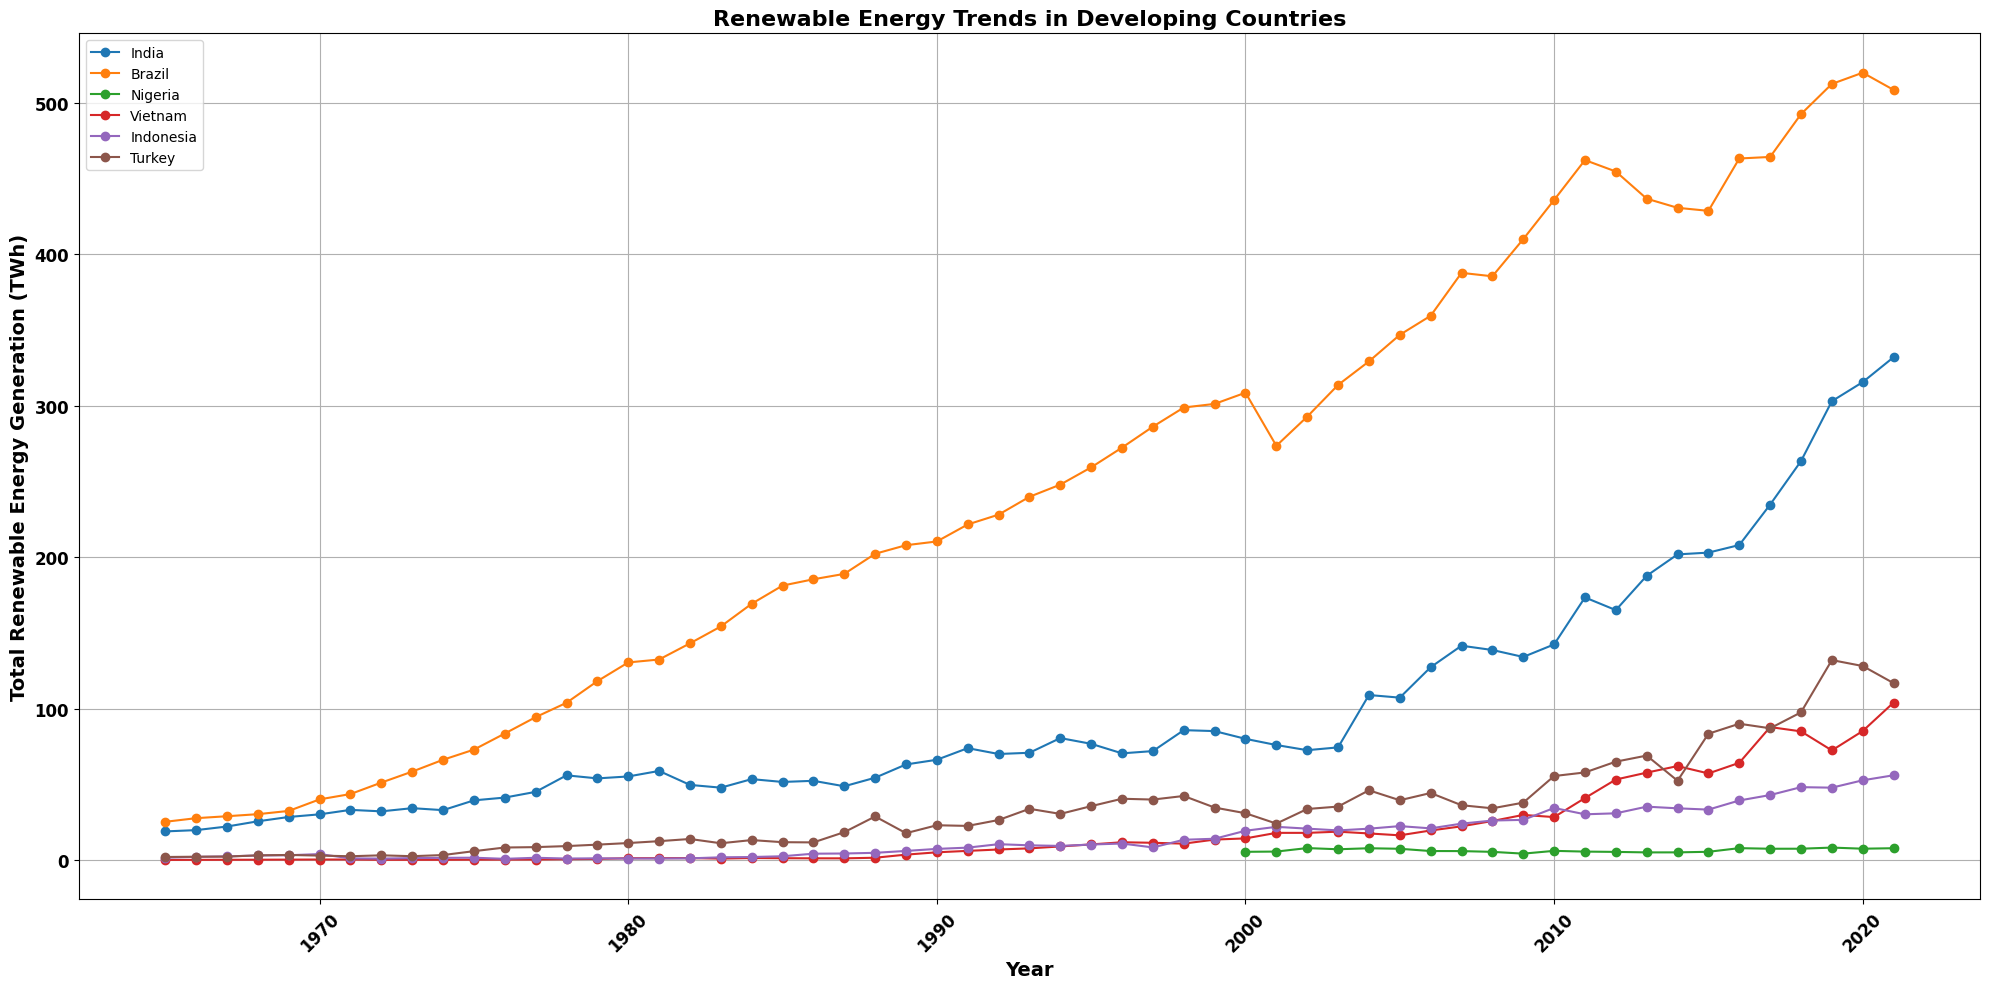

In [ ]:
developing_countries = ['India', 'Brazil', 'Nigeria', 'Vietnam', 'Indonesia', 'Turkey']

developing_countries_data = df_3[df_3['Entity'].isin(developing_countries)]

plt.figure(figsize=(20, 10))

for country in developing_countries:
    country_data = developing_countries_data[developing_countries_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Total Renewable (TWh)'], label=country, marker='o')

plt.title('Renewable Energy Trends in Developing Countries', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Renewable Energy Generation (TWh)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()
